In [1]:
import pandas as pd
import numpy as np

In [5]:
dates = pd.date_range('20200205',periods=6)
df = pd.DataFrame(np.arange(24).reshape(6,4),index=dates,columns=['A','B','C','D'])

In [14]:
df

,A,B,C,D,F
2020-02-05,0,1,2,3,1
2020-02-06,4,5,6,7,1
2020-02-07,8,9,10,11,1
2020-02-08,12,13,14,15,1
2020-02-09,16,17,18,19,1
2020-02-10,20,21,22,23,1


In [12]:
print(df.loc['20200206',['A','B']])

A    4
B    5
Name: 2020-02-06 00:00:00, dtype: int32


In [23]:
df['F'] = 1

In [24]:
df

,A,B,C,D,F,E
2020-02-05,0,1,2,3,1,1
2020-02-06,4,5,6,7,1,2
2020-02-07,8,9,10,11,1,3
2020-02-08,12,13,14,15,1,4
2020-02-09,16,17,18,19,1,5
2020-02-10,20,21,22,23,1,6


In [21]:
df['E'] = pd.Series([1,2,3,4,5,6],index=dates)

In [25]:
df

,A,B,C,D,F,E
2020-02-05,0,1,2,3,1,1
2020-02-06,4,5,6,7,1,2
2020-02-07,8,9,10,11,1,3
2020-02-08,12,13,14,15,1,4
2020-02-09,16,17,18,19,1,5
2020-02-10,20,21,22,23,1,6


In [26]:
df.iloc[2,2] = np.nan
df.iloc[3,3] = np.nan

In [27]:
df

,A,B,C,D,F,E
2020-02-05,0,1,2.0,3.0,1,1
2020-02-06,4,5,6.0,7.0,1,2
2020-02-07,8,9,NaN,11.0,1,3
2020-02-08,12,13,14.0,NaN,1,4
2020-02-09,16,17,18.0,19.0,1,5
2020-02-10,20,21,22.0,23.0,1,6


In [29]:
df.fillna(value=0) #将NaN替换成其他值

,A,B,C,D,F,E
2020-02-05,0,1,2.0,3.0,1,1
2020-02-06,4,5,6.0,7.0,1,2
2020-02-07,8,9,0.0,11.0,1,3
2020-02-08,12,13,14.0,0.0,1,4
2020-02-09,16,17,18.0,19.0,1,5
2020-02-10,20,21,22.0,23.0,1,6


In [28]:
df.dropna(axis=0,how='any')#删除有nan的行列，axis=1对列操作

,A,B,C,D,F,E
2020-02-05,0,1,2.0,3.0,1,1
2020-02-06,4,5,6.0,7.0,1,2
2020-02-09,16,17,18.0,19.0,1,5
2020-02-10,20,21,22.0,23.0,1,6


In [30]:
df.isnull() #判断是否缺失

,A,B,C,D,F,E
2020-02-05,False,False,False,False,False,False
2020-02-06,False,False,False,False,False,False
2020-02-07,False,False,True,False,False,False
2020-02-08,False,False,False,True,False,False
2020-02-09,False,False,False,False,False,False
2020-02-10,False,False,False,False,False,False


# concat合并

In [31]:
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])

In [35]:
df_concat=pd.concat([df1,df2,df3],axis=0) #合并dataframe
df_concat

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0


In [50]:
df_concat1 = pd.concat([df1,df2,df3],axis=1,ignore_index=True)
df_concat1

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0


#join合并方式

In [38]:
df4 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df5 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])

In [40]:
df_concat2 = pd.concat([df4,df5],axis=0,join='inner')
df_concat2

,b,c,d
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [42]:
df_concat3 = pd.concat([df4,df5],axis=0,join='outer',sort='True')
df_concat3

,a,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,NaN
2,NaN,1.0,1.0,1.0,1.0
3,NaN,1.0,1.0,1.0,1.0
4,NaN,1.0,1.0,1.0,1.0


In [ ]:
#append添加数据

In [43]:
df6 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df7 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])

In [44]:
df_comcat4 = df6.append(df7,ignore_index=True)
df_comcat4

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0


In [45]:
df_concat5 = df_comcat4.append(s1,ignore_index=True)
df_concat5

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,1.0,2.0,3.0,4.0


## merge合并

In [ ]:
#根据KEY合并

In [46]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})

In [47]:
print(left)
print(right)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [48]:
res0 = pd.merge(left,right,on='key')
res0

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [49]:
left1 = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right1 = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})

In [52]:
print(left1,'\n',right1)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3 
   key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3


In [53]:
res1 = pd.merge(left1,right1,on=['key1','key2'],how='inner')
res1

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [54]:
res2 = pd.merge(left1,right1,on=['key1','key2'],how='outer')
res2

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [55]:
res3 = pd.merge(left1,right1,on=['key1','key2'],how='left')
res3

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [ ]:
#根据index合并

In [56]:
left2 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right2 = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])
print(left2)
print(right2)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


In [57]:
res4 = pd.merge(left2, right2, left_index=True, right_index=True, how='outer')
print(res4)

      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3


In [58]:
res5 = pd.merge(left2, right2, left_index=True, right_index=True, how='inner')
print(res5)

     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


## matplotlib

In [2]:
import matplotlib.pyplot as plt

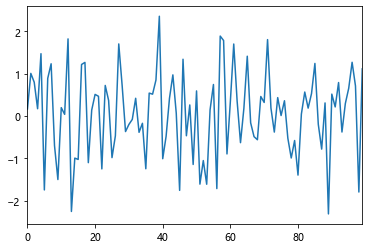

In [13]:
data = pd.Series(np.random.randn(100),index=np.arange(100))
data.cumsum()
data.plot()
plt.show()

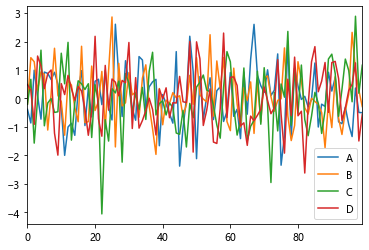

In [14]:
data1 = pd.DataFrame(np.random.randn(100,4),index=np.arange(100),columns=list("ABCD"))
data1.cumsum()
data1.plot()
plt.show()

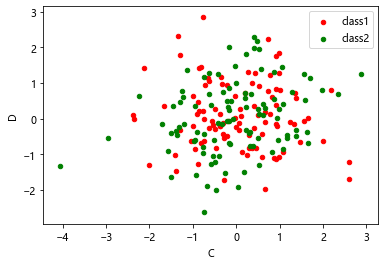

In [24]:
ax = data1.plot.scatter(x='A',y='B',color='red',label='class1')
data1.plot.scatter(x='C',y='D',color='green',label='class2',ax=ax)
plt.show()